# Plot Biomes

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import numpy as np

from importlib.machinery import SourceFileLoader
plotting = SourceFileLoader("plotting", "../../plotting.py").load_module()

In [2]:
biomes = xr.open_dataset('../data/biomes_regrid_pop.nc')

In [5]:
biomes_plot = plotting.pop_add_cyclic(biomes.rename({'lat':'TLAT','lon':'TLONG'}))

/glade/work/gclow/conda-envs/my-npl-ml/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/glade/work/gclow/conda-envs/my-npl-ml/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


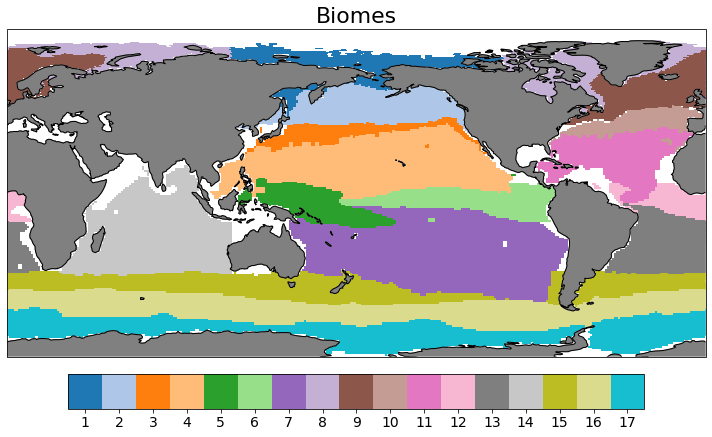

In [51]:
fig, axs = plt.subplots(figsize=(10,6), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

im1 = axs.pcolormesh(biomes_plot.TLONG, biomes_plot.TLAT, biomes_plot.MeanBiomes, 
                   transform = ccrs.PlateCarree(), cmap = plotting.biomes_cmap,
                   vmin=0.5, vmax=17.5)

axs.set_title('Biomes', fontsize = 22)

cax = fig.add_axes([0.1, 0, 0.8, 0.08])
cbar = fig.colorbar(im1, cax=cax, orientation="horizontal", ticks=np.arange(1, 18))
cbar.ax.tick_params(labelsize=14)

axs.add_feature(cartopy.feature.LAND, color='grey', zorder =1)
axs.coastlines(color = 'black', linewidth = 1)
plt.tight_layout()
plt.savefig('biomes.png',bbox_inches = 'tight',pad_inches = 0.3, dpi = 300)